# Caterpillar data - Basic descriptive statistics

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating data path
path = r'C:\Users\jnyam\Documents\Caterpillar'
# Importing data
df = pd.read_csv(os.path.join(path, 'Data', 'Caterpillar.csv'))

In [3]:
# Checking data imported
df.head(5)

,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry
0,E1072592,"Tue Jan 01, 2002","Tue Jan 22, 2002",E04,9,IN288,FL-125,72,1,1472,1958,ForkLifts-Bradshaw-HeavyDuty-YellowBlack,Bradshaw,HeavyDuty,YellowBlack,Mumbai,India,Brochure,Skanska,Construction
1,E1072593,"Tue Jan 01, 2002","Wed Jan 16, 2002",E12,9,BZ118,RP-243,47,1,6618,9265,RoadPavers-Raygo-LightDuty-WhiteYellow,Raygo,LightDuty,WhiteYellow,SaoPaulo,Brazil,Brochure,LGCorp,Conglomerate
2,E1072594,"Tue Jan 01, 2002","Mon Jan 21, 2002",E02,3,NM120,RD-516,48,2,10672,12593,RockDrillers-Tranter-LightDuty-White,Tranter,LightDuty,White,Windhoek,Namibia,Magazine,Lukoil,Oil&Gas
3,E1072595,"Tue Jan 01, 2002","Thu Jan 31, 2002",E07,4,US213,BZ-801,73,1,3013,4007,Bulldozers-JCB-HeavyDuty-Yellow,JCB,HeavyDuty,Yellow,Nashville,US,CustomerReview,State Grid of China,Electricity
4,E1072596,"Tue Jan 01, 2002","Mon Jan 21, 2002",E03,3,US219,BZ-812,16,1,7396,9171,Bulldozers-Case-HeavyDuty-White,Case,HeavyDuty,White,Detroit,US,Magazine,Cargill,FoodProcessing


In [4]:
# Checking data types
df.dtypes

Invoice               object
TransactionDate       object
DeliveryDate          object
EmpKey                object
ChannelKey             int64
StoreID               object
ProductKey            object
CustomerKey            int64
Qty                    int64
Cost                   int64
Price                  int64
ProductDescription    object
Brand                 object
Type                  object
Color                 object
CityName              object
CountryName           object
Channel               object
CustomerName          object
Industry              object
dtype: object

### Changing data types

In [5]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


# Convert TransactionDate to datetime
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])

# Not sure for Channelkey and Customerkey if they should be int64 type. Will check on the next progress. 


# Verify changes
print(df.dtypes)

Invoice                       object
TransactionDate       datetime64[ns]
DeliveryDate          datetime64[ns]
EmpKey                        object
ChannelKey                     int64
StoreID                       object
ProductKey                    object
CustomerKey                    int64
Qty                            int64
Cost                           int64
Price                          int64
ProductDescription            object
Brand                         object
Type                          object
Color                         object
CityName                      object
CountryName                   object
Channel                       object
CustomerName                  object
Industry                      object
dtype: object


In [6]:
# Checking data imported
df.shape

(806485, 20)

## DATA CONSISTENCY CHECK

In [7]:
# Checking mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

### Checking missing values

In [8]:
# checking missing values
df.isnull().sum()

Invoice               0
TransactionDate       0
DeliveryDate          0
EmpKey                0
ChannelKey            0
StoreID               0
ProductKey            0
CustomerKey           0
Qty                   0
Cost                  0
Price                 0
ProductDescription    0
Brand                 0
Type                  0
Color                 0
CityName              0
CountryName           0
Channel               0
CustomerName          0
Industry              0
dtype: int64

There is no missing values for all variables

### Checking duplicates

In [9]:
df_dups = df[df.duplicated()]

In [10]:
df_dups

,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry


There is no duplicated balues for all variables

##  BASIC DESCRIPTIVE STATS

In [11]:
df.describe()

,ChannelKey,CustomerKey,Qty,Cost,Price
count,806485.000000,806485.000000,806485.000000,806485.000000,806485.000000
mean,5.499831,852.437599,1.005514,6642.580132,8009.369146
std,2.873076,729.955726,0.555062,5103.335241,6161.158810
min,1.000000,1.000000,1.000000,1309.000000,1606.000000
25%,3.000000,293.000000,1.000000,3266.000000,3881.000000
50%,6.000000,647.000000,1.000000,5643.000000,6748.000000
75%,8.000000,1218.000000,1.000000,7967.000000,9765.000000
max,10.000000,4212.000000,100.000000,33029.000000,44731.000000


In [12]:
df.head(2)

,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry
0,E1072592,2002-01-01,2002-01-22,E04,9,IN288,FL-125,72,1,1472,1958,ForkLifts-Bradshaw-HeavyDuty-YellowBlack,Bradshaw,HeavyDuty,YellowBlack,Mumbai,India,Brochure,Skanska,Construction
1,E1072593,2002-01-01,2002-01-16,E12,9,BZ118,RP-243,47,1,6618,9265,RoadPavers-Raygo-LightDuty-WhiteYellow,Raygo,LightDuty,WhiteYellow,SaoPaulo,Brazil,Brochure,LGCorp,Conglomerate


#### BY EACH COLUMNS

In [13]:
Invoice_counts = df['Invoice'].value_counts(dropna = False)
Invoice_counts

E1514517    16
E1614405    15
E1410880    14
E1465526    14
E1855644    13
            ..
E1341368     1
E1341369     1
E1341370     1
E1341371     1
E1878902     1
Name: Invoice, Length: 806311, dtype: int64

In [14]:
TransactionDate_counts = df['TransactionDate'].value_counts(dropna = False)
TransactionDate_counts

2012-09-15    284
2011-04-05    282
2004-02-24    281
2004-05-11    281
2007-10-29    281
             ... 
2008-01-14    188
2005-02-05    188
2012-07-10    188
2013-01-01      1
2013-01-02      1
Name: TransactionDate, Length: 3446, dtype: int64

In [15]:
DeliveryDate_counts = df['DeliveryDate'].value_counts(dropna = False)
DeliveryDate_counts

2007-01-18    300
2003-05-01    298
2004-07-01    297
2010-06-17    294
2007-06-07    291
             ... 
2002-01-07     31
2002-01-05      4
2013-01-29      4
2013-02-01      3
2013-01-31      3
Name: DeliveryDate, Length: 3468, dtype: int64

In [16]:
EmpKey_counts = df['EmpKey'].value_counts(dropna = False)
EmpKey_counts

E03    54132
E01    54106
E15    54102
E05    54037
E02    53914
E07    53878
E08    53867
E10    53791
E06    53681
E12    53640
E14    53630
E09    53628
E11    53465
E04    53312
E13    53302
Name: EmpKey, dtype: int64

In [17]:
ChannelKey_counts = df['ChannelKey'].value_counts(dropna = False)
ChannelKey_counts

6     80996
10    80938
1     80933
8     80878
3     80703
7     80599
4     80558
2     80404
5     80352
9     80124
Name: ChannelKey, dtype: int64

In [18]:
StoreID_counts = df['StoreID'].value_counts(dropna = False)
StoreID_counts

FR239    9919
CH243    9905
IN288    9894
US212    9890
TU989    9884
         ... 
OC712    9544
US218    9540
US219    9529
UA120    9520
NT778    9469
Name: StoreID, Length: 83, dtype: int64

In [19]:
ProductKey_counts = df['ProductKey'].value_counts(dropna = False)
ProductKey_counts

EM-693    3540
CT-721    3519
WT-218    3519
RP-243    3511
DT-807    3489
          ... 
DD-304    3242
RP-237    3226
BB-898       1
BB-899       1
BB-892       1
Name: ProductKey, Length: 243, dtype: int64

In [20]:
CustomerKey_counts = df['CustomerKey'].value_counts(dropna = False)
CustomerKey_counts

87      844
24      843
16      841
6       838
74      838
       ... 
3961      1
3924      1
3973      1
3813      1
4155      1
Name: CustomerKey, Length: 3939, dtype: int64

In [21]:
Qty_counts = df['Qty'].value_counts(dropna = False)
Qty_counts

1     806314
2         15
3         12
8          9
6          8
       ...  
97         1
89         1
80         1
73         1
26         1
Name: Qty, Length: 62, dtype: int64

In [22]:
Cost_counts = df['Cost'].value_counts(dropna = False)
Cost_counts

2778     6798
11288    6620
6278     3540
2985     3519
4938     3519
         ... 
8272     3242
7539     3226
4545        1
6464        1
7845        1
Name: Cost, Length: 241, dtype: int64

In [23]:
Price_counts = df['Price'].value_counts(dropna = False)
Price_counts

6748     6800
3013     6756
4453     6562
7973     3540
3731     3519
         ... 
10505    3242
10102    3226
3545        1
4356        1
6545        1
Name: Price, Length: 240, dtype: int64

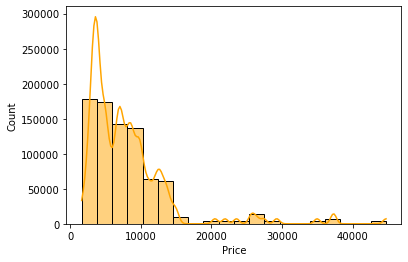

In [24]:
sns.histplot(df['Price'], bins=20, kde=True, color='orange')
plt.show()

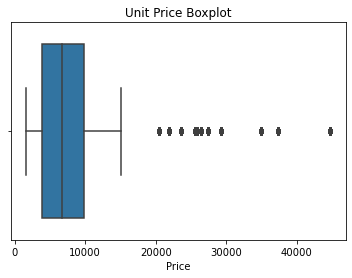

In [25]:
sns.boxplot(x=df['Price'])
plt.title('Unit Price Boxplot')
plt.show()

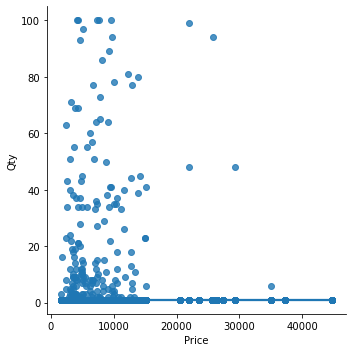

In [26]:
# Create a scatterplot for the "Qty" and "Price" columns in seaborn

plotone = sns.lmplot(x = 'Price', y = 'Qty', data = df)

In [27]:
ProductDescription_counts = df['ProductDescription'].value_counts(dropna = False)
ProductDescription_counts

EarthMovers-Noram-LightDuty-Black           3540
Compactors-Bomag-Standard-Green             3519
WindTurbines-Goldwind-Standard-Rust         3519
RoadPavers-Raygo-LightDuty-WhiteYellow      3511
DumpTrucks-Valmet-LightDuty-Black           3489
                                            ... 
Dredgers-Tigercat-LightDuty-White           3242
RoadPavers-Allatt-HeavyDuty-Orange          3226
Skidsteer-Backhoe-loader-Standard-Orange       1
Skidsteer-Backhoe-loader-Heavy-Red             1
Skidsteer-Backhoe-loader-Heavy-Yellow          1
Name: ProductDescription, Length: 243, dtype: int64

In [28]:
Brand_counts = df['Brand'].value_counts(dropna = False)
Brand_counts

Caterpillar    40204
Volvo          23613
JCB            20324
Bobcat         20313
Hitachi        20293
               ...  
Cimolai         3245
Ponsse          3244
Tigercat        3242
Allatt          3226
Bob Cat            3
Name: Brand, Length: 163, dtype: int64

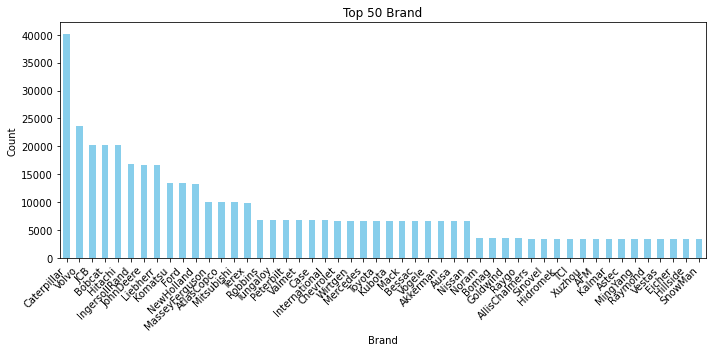

In [29]:
# Plot only the top 50 Brand 
ax = (
    df['Brand']
      .value_counts()
      .head(50)                       # keep only top 50
      .plot(kind='bar', color='skyblue', figsize=(10,5))
)

plt.title('Top 50 Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')   # rotate labels for readability
plt.tight_layout()                    # avoid label cutoff
plt.show()

In [30]:
Type_counts = df['Type'].value_counts(dropna = False)
Type_counts

LightDuty    292693
HeavyDuty    272480
Standard     241312
Name: Type, dtype: int64

In [31]:
Color_counts = df['Color'].value_counts(dropna = False)
Color_counts

White          97558
RedWhite       87189
Yellow         86913
YellowBlack    80904
Red            80292
Black          78018
Green          77743
Orange         76726
WhiteYellow    67348
GreenWhite     66875
Rust            3519
Blue            3400
Name: Color, dtype: int64

In [32]:
CityName_counts = df['CityName'].value_counts(dropna = False)
CityName_counts

Brordeaux    9919
Taipei       9905
Mumbai       9894
Houston      9890
Tunis        9884
             ... 
Auckland     9544
Lafayette    9540
Detroit      9529
Dubai        9520
Randstad     9469
Name: CityName, Length: 83, dtype: int64

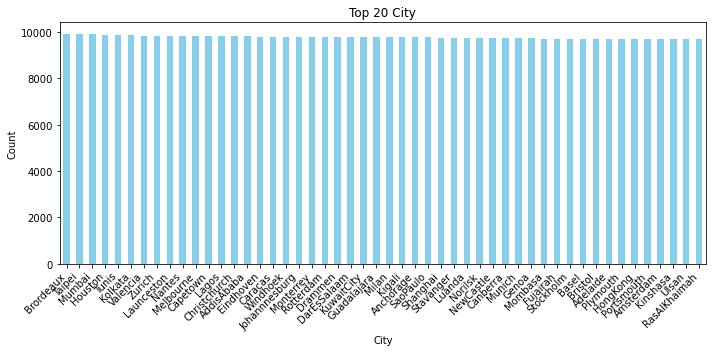

In [33]:
# Plot only the top 50 City
ax = (
    df['CityName']
      .value_counts()
      .head(50)                       # keep only top 50
      .plot(kind='bar', color='skyblue', figsize=(10,5))
)

plt.title('Top 20 City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')   # rotate labels for readability
plt.tight_layout()                    # avoid label cutoff
plt.show()

In [34]:
CountryName_counts = df['CountryName'].value_counts(dropna = False)
CountryName_counts

US             86930
Australia      67926
India          39095
China          39005
UK             38881
Netherlands    38764
UAE            38570
France         29396
Germany        29034
Russia         28988
Venezuela      19647
SouthAfrica    19619
Switzerland    19560
Mexico         19559
Norway         19524
Italy          19494
Brazil         19443
SouthKorea     19386
NewZealand     19359
Kenya          19317
Taiwan         19257
Japan          19196
Tunisia         9884
Nigeria         9819
Ethiopia        9810
Namibia         9799
Tanzania        9782
Kuwait          9776
Rwanda          9768
Angola          9741
Sweden          9717
Congo           9708
Botswana        9704
Egypt           9702
Ghana           9678
Gabon           9647
Name: CountryName, dtype: int64

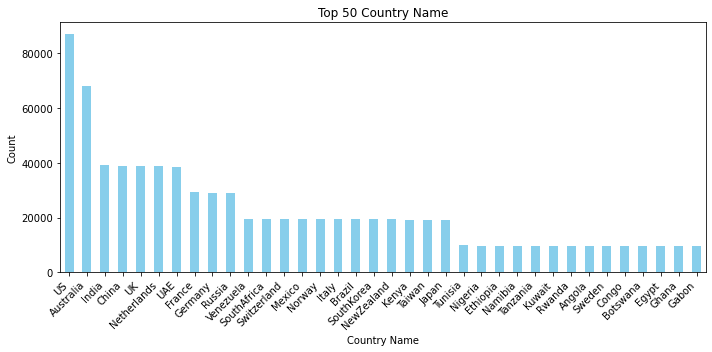

In [35]:
# Plot only the top 50 Country 
ax = (
    df['CountryName']
      .value_counts()
      .head(50)                       # keep only top 50
      .plot(kind='bar', color='skyblue', figsize=(10,5))
)

plt.title('Top 50 Country Name')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')   # rotate labels for readability
plt.tight_layout()                    # avoid label cutoff
plt.show()

In [36]:
Channel_counts = df['Channel'].value_counts(dropna = False)
Channel_counts


SocialMedia       80996
Quality           80938
OnSiteDemo        80933
Website           80878
Magazine          80703
RoadShow          80599
CustomerReview    80558
InternetReview    80404
Television        80352
Brochure          80124
Name: Channel, dtype: int64

In [37]:
CustomerName_counts = df['CustomerName'].value_counts(dropna = False)
CustomerName_counts


Walmart                844
Dangote                843
Cargill                841
Statoil                838
Barrick                838
                      ... 
Tuukka H Uosukainen      1
Benedek B Széll          1
Anne H Virta             1
Breno A Dias             1
Peter A Rønning          1
Name: CustomerName, Length: 3930, dtype: int64

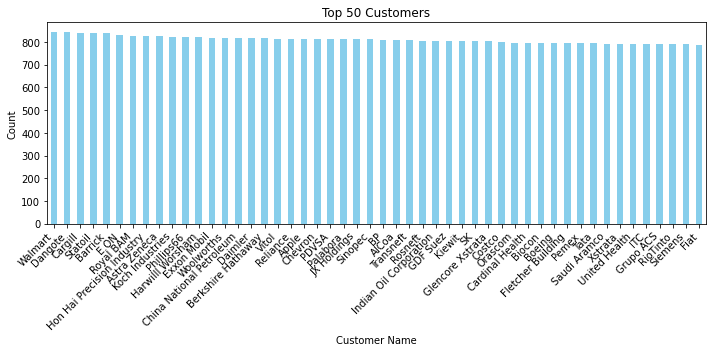

In [38]:
# Plot only the top 50 customers
ax = (
    df['CustomerName']
      .value_counts()
      .head(50)                       # keep only top 50
      .plot(kind='bar', color='skyblue', figsize=(10,5))
)

plt.title('Top 50 Customers')
plt.xlabel('Customer Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')   # rotate labels for readability
plt.tight_layout()                    # avoid label cutoff
plt.show()

In [39]:
Industry_counts = df['Industry'].value_counts(dropna = False)
Industry_counts


Reseller                   563090
Construction Contractor     98012
Realtor                     41407
Oil&Gas                     19701
Conglomerate                11872
Equipment Dealer            10328
Railway Contractor           9785
Construction                 7760
Automotive                   7675
Mining                       7159
Dealer                       6912
Retail                       5537
Electricity                  3911
Pharmaceuticals              3181
Commodities                  2338
Telecom                      2236
Electronics                  1640
FoodProcessing               1608
Healthcare                    790
Chemicals                     785
OnlineRetail                  758
Name: Industry, dtype: int64

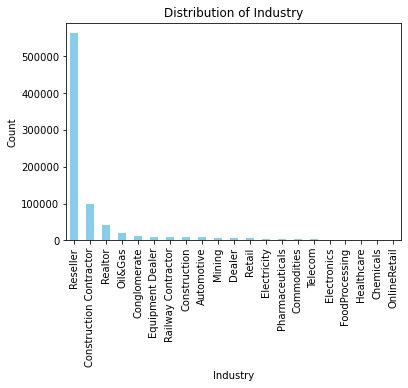

In [40]:
# Plot bar chart
ax = df['Industry'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Industry')
plt.xlabel('Industry')
plt.ylabel('Count')


plt.show()